In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
def thresholding(pixel, threshold = 2.5):
    gray = (pixel[0]+pixel[1]+pixel[2])*pixel[3]
    return 0 if gray < threshold else 1

def getABlack(circuit):
    px = 0
    while circuit[px//circuit.shape[0]][px%circuit.shape[1]] == 1:
        px += 1
    return (px//circuit.shape[0], px%circuit.shape[1])
    
def count_blk_around(img, x, y):
    around = 8
    for a in range(-1,2):
        for b in range(-1,2):
            x2 = x+a
            y2 = y+b
            if(not (a == 0 and b == 0) and x2>=0 and y2 >= 0 and x2<=circuit.shape[1]-1 and y2<=circuit.shape[0]-1):
                around -= img[y2][x2]
    return around

def appendToTrack(circuit, x, y, track):
    tck = []
    for a in range(-1,2):
            for b in range(-1,2):
                x2 = x+a
                y2 = y+b
                if(not (a == 0 and b == 0) and x2>=0 and y2>=0 and x2<=circuit.shape[1]-1 and y2<=circuit.shape[0]-1):
                    count = count_blk_around(circuit, x2, y2)
                    already_in_track = (x2,y2) in track
                    is_black = int(circuit[y2][x2]) == 0
                    if(not already_in_track and is_black and count > 3 and count < 8):
                        tck.append((x2,y2))
    return tck

def resize(track, circuit, new_shape=(720,1080), offset= (0,0)):
    track_recized = []
    factor = min(new_shape[0] / circuit.shape[0], new_shape[1] / circuit.shape[1])
    for t in track:
        track_recized.append((math.floor(t[0]*factor +offset[0]), math.floor(t[1]*factor + offset[1])))
    return track_recized

def reverse(track):
    return [track[i] for i in range(len(track)-1, -1, -1)]

def quantify(track, step):
    quantified = [ (p[0] - p[0]%step, p[1] - p[1]%step) for p in track]
    quantified_unique = []
    for q in quantified:
        if q not in quantified_unique:
            quantified_unique.append(q)
    return quantified_unique

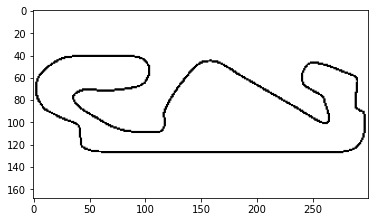

[(27, 42), (28, 42), (29, 41), (29, 42)]
1999


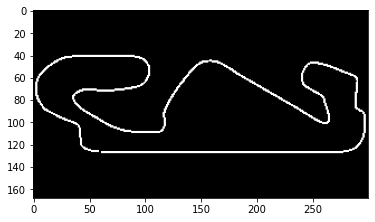

In [9]:
circuit_img = plt.imread('catalogne.png')
circuit = np.array([[thresholding(px, threshold=1.93) for px in line]for line in circuit_img])
plt.imshow(circuit, cmap="gray")
plt.show()

track = []
y, x = getABlack(circuit)
track.append((x,y))
tck = appendToTrack(circuit, x,y, track)
while len(tck) > 0:
    x,y = tck.pop()
    tmp_tck = appendToTrack(circuit,x,y, track)
    for t in tmp_tck:
        if(t not in tck): tck.append(t)
    track.append((x,y))

circ = np.zeros_like(circuit)
for p in track:
    circ[p[1]][p[0]] = 1
plt.imshow(circ, cmap="gray")
plt.show()

In [10]:
small_track = []
for i in range(len(track)):
    if(i%20 == 0): small_track.append(track[i])
print(len(small_track))

100


In [11]:
small_track_ordered = [small_track.pop()]
while len(small_track) > 0:
    p = small_track_ordered[-1]
    neighbor = 0
    mini = math.sqrt((small_track[neighbor][0]-p[0])**2 + (small_track[neighbor][1]-p[1])**2)
    for i in range(1,len(small_track)):
        n = small_track[i]
        dist = math.sqrt((n[0]-p[0])**2 + (n[1]-p[1])**2)
        if(dist < mini): 
            mini = dist
            neighbor = i
    small_track_ordered.append(small_track.pop(neighbor))

In [12]:
final_track = reverse(resize(small_track_ordered, circuit, (720,980), (20,20)))

quantify_final_track = quantify(final_track, 10)


print(tuple(quantify_final_track))

((100, 160), (110, 150), (170, 150), (240, 150), (300, 150), (350, 180), (350, 190), (340, 220), (310, 240), (280, 240), (240, 250), (210, 250), (180, 250), (150, 250), (140, 280), (140, 290), (190, 320), (200, 330), (230, 340), (270, 360), (290, 360), (330, 370), (350, 370), (390, 360), (400, 340), (410, 300), (410, 280), (440, 240), (450, 230), (470, 200), (500, 170), (510, 170), (560, 170), (570, 180), (610, 190), (640, 210), (660, 220), (700, 250), (750, 280), (770, 290), (800, 310), (830, 330), (840, 330), (880, 320), (850, 260), (850, 250), (810, 230), (800, 210), (820, 180), (840, 170), (880, 180), (900, 180), (950, 200), (960, 260), (960, 270), (980, 310), (990, 330), (980, 370), (980, 390), (950, 420), (920, 430), (880, 430), (850, 430), (820, 430), (790, 430), (750, 430), (720, 430), (680, 430), (660, 430), (620, 430), (590, 430), (550, 430), (520, 430), (490, 430), (460, 430), (420, 430), (390, 430), (360, 430), (330, 430), (290, 430), (260, 430), (230, 430), (180, 420), (17